Загрузите **одно** фото в папку `images` и переименуйте его в **"1.jpg"**

In [105]:
import sys
!{sys.executable} -m pip install --quiet opencv-python azure-cognitiveservices-vision-face

In [106]:
import os, requests, glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [107]:
key = '3eedbefda94449129615497638a01259' # ключ выглядит примерно так: 'e408f9b7c8e349ee8f335567432df30'
endpoint = 'https://slaerface.cognitiveservices.azure.com/' # убедитесь, что конечная точка правильная


In [108]:
import azure.cognitiveservices.vision.face as cf
from msrest.authentication import CognitiveServicesCredentials
cli = cf.FaceClient(endpoint,CognitiveServicesCredentials(key))
face_url = 'https://2016.dotnext-piter.ru/assets/images/people/soshnikov.jpg'
res = cli.face.detect_with_url(face_url,return_face_landmarks=True)
print(res[0].face_landmarks.as_dict())

{'pupil_left': {'x': 112.6, 'y': 126.7}, 'pupil_right': {'x': 170.9, 'y': 118.9}, 'nose_tip': {'x': 148.7, 'y': 158.4}, 'mouth_left': {'x': 121.6, 'y': 182.6}, 'mouth_right': {'x': 177.8, 'y': 172.1}, 'eyebrow_left_outer': {'x': 84.1, 'y': 120.3}, 'eyebrow_left_inner': {'x': 122.9, 'y': 110.1}, 'eye_left_outer': {'x': 103.3, 'y': 128.9}, 'eye_left_top': {'x': 112.3, 'y': 122.8}, 'eye_left_bottom': {'x': 113.7, 'y': 131.4}, 'eye_left_inner': {'x': 122.4, 'y': 126.7}, 'eyebrow_right_inner': {'x': 157.2, 'y': 106.3}, 'eyebrow_right_outer': {'x': 192.1, 'y': 106.6}, 'eye_right_inner': {'x': 162.7, 'y': 120.8}, 'eye_right_top': {'x': 171.3, 'y': 115.0}, 'eye_right_bottom': {'x': 172.7, 'y': 123.5}, 'eye_right_outer': {'x': 181.5, 'y': 118.5}, 'nose_root_left': {'x': 135.4, 'y': 126.3}, 'nose_root_right': {'x': 151.5, 'y': 124.3}, 'nose_left_alar_top': {'x': 131.9, 'y': 147.4}, 'nose_right_alar_top': {'x': 158.4, 'y': 143.8}, 'nose_left_alar_out_tip': {'x': 128.2, 'y': 159.3}, 'nose_right_al

Анализируем изображение:  images/1.jpg


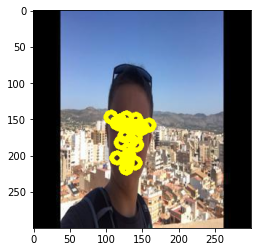

In [109]:
def imread(fn):
    im = cv2.imread(fn)
    return cv2.cvtColor(im,cv2.COLOR_BGR2RGB) if im is not None else None

fn = glob.glob('images/*')[0]
print('Анализируем изображение: ',fn)

img = imread(fn)
cli.face.detect_with_url(face_url)
with open(fn,'rb') as f:
    res = cli.face.detect_with_stream(f,return_face_landmarks=True)
for k,v in res[0].face_landmarks.as_dict().items():
    cv2.circle(img,(int(v['x']),int(v['y'])),7,(255,255,0),5)
plt.imshow(img)

In [110]:
filenames = []
images = []
imagepoints = []
cli.face.detect_with_url(face_url)
for fn in glob.glob("images/*")[0:20]:
    print("Обрабатываю картинку {} ".format(fn),end='')
    try:
        with open(fn,'rb') as f:
            res = cli.face.detect_with_stream(f,return_face_landmarks=True)
    except:
        print(' - ОШИБКА - ',end='')
        res = []
    print(' найдено {} лиц'.format(len(res)))
    if len(res)>0:
        filenames.append(fn)
        images.append(imread(fn))
        imagepoints.append(res[0].face_landmarks.as_dict())

Обрабатываю картинку images/1.jpg  найдено 1 лиц


Обрабатываю картинку images/1.jpg  найдено 1 лиц


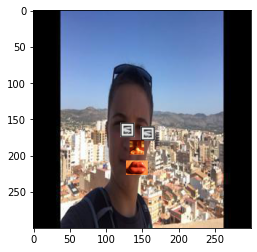

In [111]:
from PIL import Image


target_triangle = np.float32([[130.0,120.0],[170.0,120.0],[150.0,160.0]])
size = 300
img = Image.open('images/1.jpg').resize((size, size))
img.save('images/1.jpg')
sofa = Image.open('sofa.jpg')
nose = Image.open('nose.jpg')
for fn in glob.glob("images/*")[0:20]:
    print("Обрабатываю картинку {} ".format(fn),end='')
    try:
        with open(fn,'rb') as f:
            res = cli.face.detect_with_stream(f,return_face_landmarks=True)
    except:
        print(' - ОШИБКА - ',end='')
        res = []
    print(' найдено {} лиц'.format(len(res)))
    if len(res)>0:
        filenames.append(fn)
        images.append(imread(fn))
        imagepoints.append(res[0].face_landmarks.as_dict())
pict = Image.open('pict.jpg')
eyeL = res[0].face_landmarks.as_dict()['pupil_left']
eyeR = res[0].face_landmarks.as_dict()['pupil_right']
mc_x = (res[0].face_landmarks.as_dict()['mouth_left']['x']+res[0].face_landmarks.as_dict()['mouth_right']['x'])/2.0
mc_y = (res[0].face_landmarks.as_dict()['mouth_left']['y'] + res[0].face_landmarks.as_dict()['mouth_right']['y']) / 2.0
noseR = res[0].face_landmarks.as_dict()['nose_right_alar_out_tip']
noseL = res[0].face_landmarks.as_dict()['nose_left_alar_out_tip']
noseRR = res[0].face_landmarks.as_dict()['nose_right_alar_top']
noseLL = res[0].face_landmarks.as_dict()['nose_left_alar_top']
img.paste(pict.resize((20, 20)), (round(eyeL['x']), round(eyeL['y'])))
img.paste(pict.resize((20, 20)), (round(eyeR['x']), round(eyeR['y'])))
img.paste(sofa.resize((30, 20)), (round(mc_x), round(mc_y)))
img.paste(nose.resize((20, 20)), (round((noseR['x']  + noseRR['x'] + noseLL['x'] +  noseL['x']) / 4), round((noseR['y']  + noseRR['y'] + noseLL['y'] +  noseL['y']) / 4)))
img.save('res.jpg')
plt.imshow(img)